## The question of the shape of the temperature - damage relationship

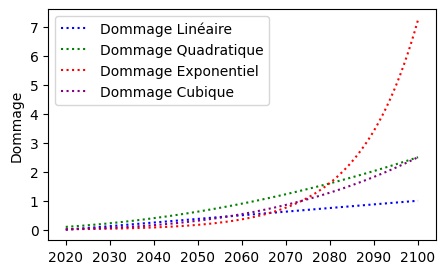

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du temps et de la température
temps = np.linspace(2020, 2100, 100)  # Période de 2020 à 2100
temperature = np.linspace(1, 5, 100)  # Température augmentant de 1°C à 5°C
# Différentes fonctions de dommage basées sur la température
def dommage_lineaire(temp):
    return 0.25 * temp - 0.25

def dommage_quadratique(temp):
    return 0.1 * temp**2 

def dommage_exponentiel(temp):
    return 0.004 * np.exp(1.5 * temp)

def dommage_cubique(temp):
    return 0.02 * temp**3

def dommage_inv_cubique(temp):
    return 1* (1 - 1 / (1 + 3 * temp + temp**2 + 5 * temp**3))

# Simulations de dommages pour chaque scénario au cours du temps
dommages_lineaire = dommage_lineaire(temperature)
dommages_quadratique = dommage_quadratique(temperature)
dommages_exponentiel = dommage_exponentiel(temperature)
dommages_cubique = dommage_cubique(temperature)
dommages_inv_cubique = dommage_inv_cubique(temperature)

# Tracer les courbes
plt.figure(figsize=(5, 3))

plt.plot(temps, dommages_lineaire, label="Dommage Linéaire", linestyle=':', color='b')
plt.plot(temps, dommages_quadratique, label="Dommage Quadratique", linestyle=':', color='g')
plt.plot(temps, dommages_exponentiel, label="Dommage Exponentiel", linestyle=':', color='r')
plt.plot(temps, dommages_cubique, label="Dommage Cubique", linestyle=':', color='purple')
#plt.plot(temps, dommages_inv_cubique, label="Dommage Inverse Cubique", linestyle='-', color='orange')

# Ajout des labels et du titre
#plt.xlabel("Temps (années)")
plt.ylabel("Dommage")
#plt.yscale('log')

#plt.title("Différentes fonctions de dommage en fonction de la température au cours du temps")
plt.legend()

# Annotation pour montrer l'incertitude
#plt.text(2075, 10, 'Incertitude \nsur la forme future', color='black', fontsize=12)

# Afficher la grille
plt.grid(False)

# Afficher le graphe
plt.savefig('../../../../Memoire/results/shape.png', dpi=300)
plt.show()


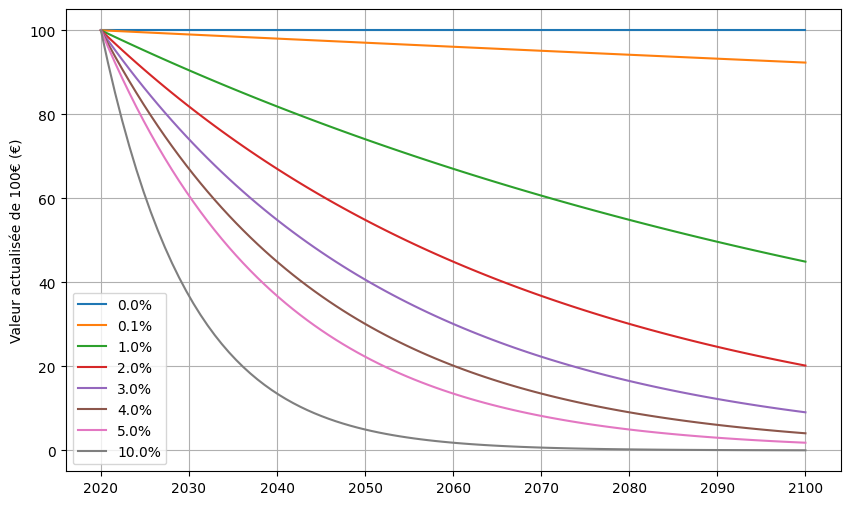

In [61]:
# Define discount rates
discount_rates = [0, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]

# Calculate discounted values for each discount rate
discounted_values = {rate: 100*np.exp(-rate * (temps - temps[0])) for rate in discount_rates}

# Plot the discounted values
plt.figure(figsize=(10, 6))

for rate, values in discounted_values.items():
    plt.plot(temps, values, label=f'{rate*100:.1f}%') 

# Add labels and title
#plt.xlabel("Time (years)")
plt.ylabel("Valeur actualisée de 100€ (€)")
#plt.title("Valeur actualisée de 100€ en fonction du temps pour différents taux d'actualisation")
plt.legend()

# Show grid
plt.grid(True)

# Show the plot

plt.savefig('../../../../Memoire/results/actualisation.png', dpi=300)
plt.show()